In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Summery Points

1. Revenue Generated by individual operator.
2. Revenue Generated by individual branch.
3. Revenue Generated by individual driver.
4. Total pizza delivered by the individual driver.
5. Total pizza delivered by the individual Day or per week. week

In [35]:
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("../Dataset/pizza_delivery.csv")

In [3]:
df.head(10)

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
1,Thursday,01-May-14,25.203074,Melissa,East,Salvatore,70.997791,26.4,2,0,0,0
2,Thursday,01-May-14,45.643404,Melissa,West,Salvatore,53.394145,58.1,3,1,0,0
3,Thursday,01-May-14,29.374298,Melissa,East,Salvatore,70.306596,35.2,3,0,0,0
4,Thursday,01-May-14,29.994610,Melissa,West,Salvatore,71.501688,38.4,2,0,0,0
5,Thursday,01-May-14,40.254321,Melissa,Centre,Bruno,60.759504,61.8,4,1,1,0
6,Thursday,01-May-14,48.728610,Laura,West,Bruno,58.258697,57.9,3,1,1,0
7,Thursday,01-May-14,34.027722,Melissa,West,Mario,68.127927,35.8,2,0,0,0
8,Thursday,01-May-14,28.209429,Laura,Centre,Mario,64.946607,36.6,2,0,0,0
9,Thursday,01-May-14,37.954792,Melissa,Centre,Bruno,60.007379,44.8,5,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                1266 non-null   object 
 1   date               1266 non-null   object 
 2   time               1266 non-null   float64
 3   operator           1266 non-null   object 
 4   branch             1266 non-null   object 
 5   driver             1266 non-null   object 
 6   temperature        1266 non-null   float64
 7   bill               1266 non-null   float64
 8   pizzas             1266 non-null   int64  
 9   free_wine          1266 non-null   int64  
 10  got_wine           1266 non-null   int64  
 11  discount_customer  1266 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 118.8+ KB


In [6]:
df.isnull().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [11]:
df.nunique()

day                     7
date                   31
time                 1266
operator                2
branch                  3
driver                  5
temperature          1266
bill                  438
pizzas                 10
free_wine               2
got_wine                2
discount_customer       2
dtype: int64

In [8]:
df.isna().sum()

day                  0
date                 0
time                 0
operator             0
branch               0
driver               0
temperature          0
bill                 0
pizzas               0
free_wine            0
got_wine             0
discount_customer    0
dtype: int64

In [13]:
df.nunique()

day                     7
date                   31
time                 1266
operator                2
branch                  3
driver                  5
temperature          1266
bill                  438
pizzas                 10
free_wine               2
got_wine                2
discount_customer       2
dtype: int64

**Total number of individual operator**

In [12]:
df["operator"].unique()

array(['Laura', 'Melissa'], dtype=object)

**Total number of branch**

In [14]:
df["branch"].unique()

array(['East', 'West', 'Centre'], dtype=object)

**Total numbers of drivers**

In [16]:
df["driver"].unique()

array(['Bruno', 'Salvatore', 'Mario', 'Luigi', 'Domenico'], dtype=object)

# Filtering the data

In [28]:
## create a group by operator

operator_group = df.groupby("operator")

In [29]:
operator_group.get_group("Laura")

,day,date,time,operator,branch,driver,temperature,bill,pizzas,free_wine,got_wine,discount_customer
0,Thursday,01-May-14,35.128367,Laura,East,Bruno,68.287716,58.4,4,0,0,1
6,Thursday,01-May-14,48.728610,Laura,West,Bruno,58.258697,57.9,3,1,1,0
8,Thursday,01-May-14,28.209429,Laura,Centre,Mario,64.946607,36.6,2,0,0,0
11,Thursday,01-May-14,24.807937,Laura,East,Mario,62.789668,49.7,3,0,0,0
14,Thursday,01-May-14,23.784281,Laura,West,Bruno,64.626456,25.9,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,Saturday,31-May-14,39.172779,Laura,East,Domenico,54.042554,31.4,3,0,0,0
1261,Saturday,31-May-14,38.639420,Laura,West,Mario,63.126424,46.7,4,0,0,0
1262,Saturday,31-May-14,33.812971,Laura,East,Domenico,56.302727,32.0,1,0,0,0
1263,Saturday,31-May-14,33.140080,Laura,Centre,Luigi,57.977168,45.7,3,0,0,1


### Revenue generated by individual operator

In [30]:
## calculate the bill generated by individual operator

operator_bill = operator_group.bill.sum()
operator_bill

operator
Laura      27163.0
Melissa    26966.0
Name: bill, dtype: float64

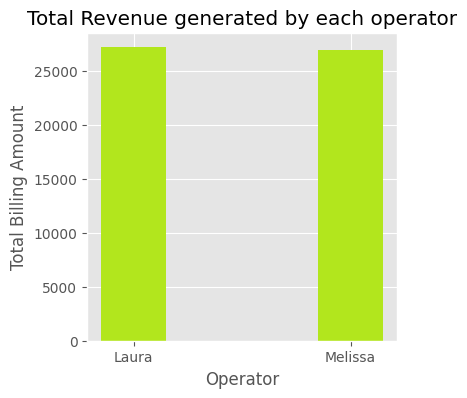

In [36]:
fig , axes = plt.subplots(figsize=(4,4))

# plot a bar graph
axes.bar(operator_bill.index, operator_bill, width=0.3, color='#B2E61D')

axes.set_xlabel("Operator")
axes.set_ylabel("Total Billing Amount")
plt.title("Total Revenue generated by each operator")
plt.show()

### Revenue Generated by individual branch

In [37]:
branch_group = df.groupby("branch")

In [38]:
branch_bill = branch_group.bill.sum()

In [39]:
branch_bill

branch
Centre    19831.4
East      15064.2
West      19233.4
Name: bill, dtype: float64

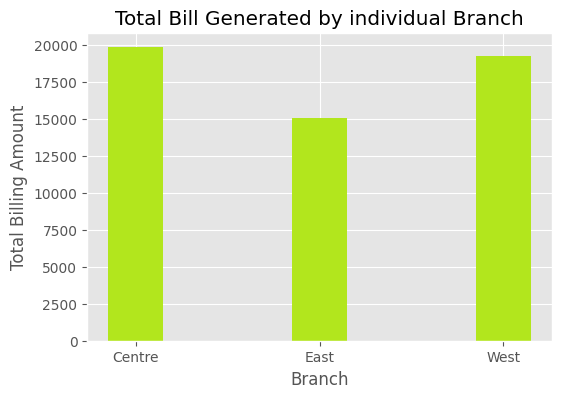

In [43]:
fig, axes = plt.subplots(figsize=(6,4))

axes.bar(branch_bill.index, branch_bill, width=.3, color="#B2E61D")

axes.set_xlabel("Branch")
axes.set_ylabel("Total Billing Amount")
plt.title("Total Bill Generated by individual Branch")
plt.show()

### Bill generated by individual operator on individual branch

In [47]:
operator_per_branch_bill = operator_group.apply(lambda group: group.groupby("branch").bill.sum())

In [48]:
operator_per_branch_bill

branch,Centre,East,West
operator,,,
Laura,10090.2,7598.2,9474.6
Melissa,9741.2,7466.0,9758.8


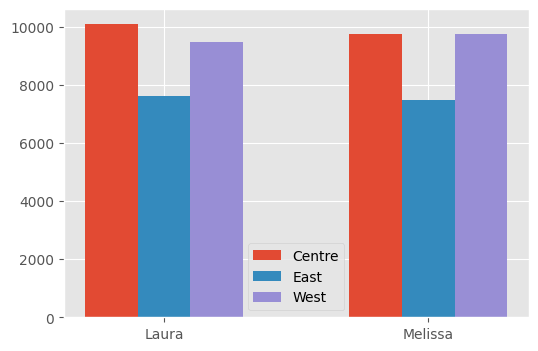

In [57]:
fig , axes = plt.subplots(figsize=(6,4))

width=0.2
offset = 0

labels = np.arange(len(operator_per_branch_bill.index))

for operator, values in operator_per_branch_bill.items():
    axes.bar(labels+offset, values, label=operator, width=width)
    offset+=width

midpoint = labels+(len(operator_per_branch_bill.columns)*width)/2
axes.set_xticks(midpoint-(width/2), operator_per_branch_bill.index)

plt.legend()
plt.show()

### Revenue Generated by individual driver.